In [15]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install gradio
!pip install PIL
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/MyDrive/Bigdata

/content/drive/MyDrive/Bigdata


In [19]:

#Replace part of string with another string
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import mean, col, max, countDistinct, concat
from pyspark.sql.functions import col,isnan, when, count
import pandas as pd
from datetime import datetime
from dateutil import parser
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import time
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import PIL
import gradio as gr



In [20]:
df_train = pd.read_csv('train.csv', low_memory=False)

In [21]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.read.csv("train.csv",header=True,sep=",")

# print(df.collect())

In [22]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df.count(), len(df.dtypes)))


Total Row Number: 682154 
Total Col Number: 49


In [23]:
df.show()

+----------+--------------+----+-----+-----+----+----+----+-----------+------+-------+-----------------+------------+------+--------+-------+---------+--------------+----+--------+-------------+-------------------+----------------------+-----------+----------------+----------------+-----------------+----------------+-------------+--------------------+--------------------+-----+------------+------------+---------------+-----------------+--------+------------+---------------+----+----------------+--------------+-----------+----------+--------------+-----------+--------+---------+-------------+
|    GameId|        PlayId|Team|    X|    Y|   S|   A| Dis|Orientation|   Dir|  NflId|      DisplayName|JerseyNumber|Season|YardLine|Quarter|GameClock|PossessionTeam|Down|Distance|FieldPosition|HomeScoreBeforePlay|VisitorScoreBeforePlay|NflIdRusher|OffenseFormation|OffensePersonnel|DefendersInTheBox|DefensePersonnel|PlayDirection|         TimeHandoff|            TimeSnap|Yards|PlayerHeight|PlayerWe

In [24]:
df.columns

['GameId',
 'PlayId',
 'Team',
 'X',
 'Y',
 'S',
 'A',
 'Dis',
 'Orientation',
 'Dir',
 'NflId',
 'DisplayName',
 'JerseyNumber',
 'Season',
 'YardLine',
 'Quarter',
 'GameClock',
 'PossessionTeam',
 'Down',
 'Distance',
 'FieldPosition',
 'HomeScoreBeforePlay',
 'VisitorScoreBeforePlay',
 'NflIdRusher',
 'OffenseFormation',
 'OffensePersonnel',
 'DefendersInTheBox',
 'DefensePersonnel',
 'PlayDirection',
 'TimeHandoff',
 'TimeSnap',
 'Yards',
 'PlayerHeight',
 'PlayerWeight',
 'PlayerBirthDate',
 'PlayerCollegeName',
 'Position',
 'HomeTeamAbbr',
 'VisitorTeamAbbr',
 'Week',
 'Stadium',
 'Location',
 'StadiumType',
 'Turf',
 'GameWeather',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'WindDirection']

In [25]:

#Pandas
start = time.time()
nullvalues = df_train.loc[:, df_train.isnull().any()].isnull().sum()
end = time.time()
print(end-start)

#Spark
start = time.time()
unique_value = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
end = time.time()
print(end-start)

unique_value.show()

2.6922454833984375
1.426992416381836
+------+------+----+---+---+---+---+---+-----------+---+-----+-----------+------------+------+--------+-------+---------+--------------+----+--------+-------------+-------------------+----------------------+-----------+----------------+----------------+-----------------+----------------+-------------+-----------+--------+-----+------------+------------+---------------+-----------------+--------+------------+---------------+----+-------+--------+-----------+----+-----------+-----------+--------+---------+-------------+
|GameId|PlayId|Team|  X|  Y|  S|  A|Dis|Orientation|Dir|NflId|DisplayName|JerseyNumber|Season|YardLine|Quarter|GameClock|PossessionTeam|Down|Distance|FieldPosition|HomeScoreBeforePlay|VisitorScoreBeforePlay|NflIdRusher|OffenseFormation|OffensePersonnel|DefendersInTheBox|DefensePersonnel|PlayDirection|TimeHandoff|TimeSnap|Yards|PlayerHeight|PlayerWeight|PlayerBirthDate|PlayerCollegeName|Position|HomeTeamAbbr|VisitorTeamAbbr|Week|Stadium

In [26]:
def Plays_Games_Players():
  #Pandas
  start = time.time()
  unique_plays = df_train.groupby('Season').agg({'PlayId': 'nunique', 'GameId': 'nunique', 'NflId':'nunique'})
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  playIddistinct = df.groupBy("Season").agg(countDistinct('PlayId')) 
  GameIddistinct = df.groupBy("Season").agg(countDistinct('GameId')) 
  NflIddistinct = df.groupBy("Season").agg(countDistinct('NflId')) 

  end = time.time()
  spark_query = (end-start)


  # playIddistinct.show()
  # GameIddistinct.show()
  # NflIddistinct.show()

  playIddistinct = playIddistinct.toPandas()
  GameIddistinct = GameIddistinct.toPandas()
  NflIddistinct = NflIddistinct.toPandas()

  f,ax=plt.subplots(1,3,figsize=(11,4))
  playIddistinct.plot(ax=ax[0],color='crimson', kind='bar')

  ax[0].set_title('Count of Plays')
  GameIddistinct.plot(ax=ax[1],color='darkmagenta', kind='bar')

  ax[1].set_title('Count of Games')
  NflIddistinct.plot(ax=ax[2],color='slateblue', kind='bar')

  ax[2].set_title('Count of Player')

  # plt.show()
  plt.savefig('test.png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [27]:
def Away_Home():
  #Pandas
  start = time.time()
  df_team = df_train.loc[:,['PlayId', 'Team']].drop_duplicates()
  teamcount = df_team["Team"].value_counts()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  team_count = df.select('PlayId', 'Team').drop_duplicates().groupby('Team').count().orderBy('count', ascending=False)
  end = time.time()
  spark_query = (end-start)



  team_count = team_count.toPandas()
  print(team_count)
  fig = px.bar(team_count, x='Team', y='count')
  fig.update_layout(
      title_text="Team (Away or Home)", height=300, width=300)
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
# fig.show()

In [28]:
def weight_height_fre():
  #Pandas
  start = time.time()
  df_player = df_train.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_player = df.select('NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName').drop_duplicates()
  end = time.time()
  spark_query = (end-start)

  # df_player.show()

  df_player = df_player.toPandas()
  df_player = df_player.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  df_player["HeightFt"] = df_player["PlayerHeight"].str.split('-', expand=True)[0].astype(int)
  df_player["HeightIn"] = df_player["PlayerHeight"].str.split('-', expand=True)[1].astype(int)
  df_player["HeightCm"] = df_player["HeightFt"]*30.48 + df_player["HeightIn"]*2.54
  df_player['PlayerWeight'] = df_player['PlayerWeight'].astype(float)
  df_player["WeightKg"] = df_player["PlayerWeight"]*0.45359237
  df_height = df_player.groupby(['PlayerHeight','HeightFt','HeightIn']).size().reset_index().sort_values(["HeightFt", "HeightIn"])
  df_height.columns = ["PlayerHeight","HeightFt","HeightIn","Count"]


  f,ax=plt.subplots(1,2,figsize=(13,5))
  df_height.loc[:,["PlayerHeight","Count"]].set_index("PlayerHeight").plot(ax=ax[0],color='slateblue', kind='bar')

  ax[0].set_xlabel("Height") 
  ax[0].set_ylabel("Count") 
  ax[0].get_legend().remove()
  ax[0].set_title('Player Height (ft-in)')

  df_player.PlayerWeight.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='steelblue')

  ax[1].set_xlabel("Weight") 
  ax[1].set_title('Player Weight (lbs)')
  plt.savefig('test.png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
# plt.show()

In [29]:
def weight_height_corre():
  #Pandas
  start = time.time()
  df_player = df_train.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_player = df.select('NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName').drop_duplicates()
  end = time.time()
  spark_query = (end-start)

  # df_player.show()

  df_player = df_player.toPandas()
  df_player = df_player.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  df_player["HeightFt"] = df_player["PlayerHeight"].str.split('-', expand=True)[0].astype(int)
  df_player["HeightIn"] = df_player["PlayerHeight"].str.split('-', expand=True)[1].astype(int)
  df_player["HeightCm"] = df_player["HeightFt"]*30.48 + df_player["HeightIn"]*2.54
  df_player['PlayerWeight'] = df_player['PlayerWeight'].astype(float)
  df_player["WeightKg"] = df_player["PlayerWeight"]*0.45359237
  df_height = df_player.groupby(['PlayerHeight','HeightFt','HeightIn']).size().reset_index().sort_values(["HeightFt", "HeightIn"])
  df_height.columns = ["PlayerHeight","HeightFt","HeightIn","Count"]

  fig = go.Figure(data=go.Scattergl
  (
      x = df_player["HeightCm"], 
      y = df_player["WeightKg"],
      mode='markers',
      text = df_player['DisplayName'],
      marker=dict(line_width=0.4),
      marker_color='rgb(0,145,119)'))

  fig.update_layout(title='Weight Height Correlation', height=600, width=800)
  fig.update_xaxes(title_text="Height (Cm)")
  fig.update_yaxes(title_text="Weight (Kg)")
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
  # fig.show()

In [30]:
def Player_Colleges_Fre():
  #Pandas
  start = time.time()
  df_player = df_train.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_player = df.select('NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName').drop_duplicates()
  end = time.time()
  spark_query = (end-start)

  # df_player.show()

  df_player = df_player.toPandas()
  df_player = df_player.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  df_player["HeightFt"] = df_player["PlayerHeight"].str.split('-', expand=True)[0].astype(int)
  df_player["HeightIn"] = df_player["PlayerHeight"].str.split('-', expand=True)[1].astype(int)
  df_player["HeightCm"] = df_player["HeightFt"]*30.48 + df_player["HeightIn"]*2.54
  df_player['PlayerWeight'] = df_player['PlayerWeight'].astype(float)
  df_player["WeightKg"] = df_player["PlayerWeight"]*0.45359237
  df_height = df_player.groupby(['PlayerHeight','HeightFt','HeightIn']).size().reset_index().sort_values(["HeightFt", "HeightIn"])
  df_height.columns = ["PlayerHeight","HeightFt","HeightIn","Count"]

  Collage = df_player["PlayerCollegeName"].value_counts()
  df_CollageCount = pd.DataFrame({'College Name':Collage.index, 'Count':Collage.values}).sort_values("Count", ascending = False).head(50)

  fig = px.bar(df_CollageCount, x='College Name', y='Count', title="The 50 Top Colleges With The Most Players", height=700, width=800)

  fig.update_traces(marker_color='rgb(239, 117, 100)', marker_line_color='rgb(8,48,107)',
                    marker_line_width=2, opacity=0.7)
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
  # fig.show()

In [31]:
def Age_Fre(): 
  #Pandas
  start = time.time()
  df_player = df_train.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_player = df.select('NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName').drop_duplicates()
  end = time.time()
  spark_query = (end-start)

  # df_player.show()

  df_player = df_player.toPandas()
  df_player = df_player.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
  df_player["HeightFt"] = df_player["PlayerHeight"].str.split('-', expand=True)[0].astype(int)
  df_player["HeightIn"] = df_player["PlayerHeight"].str.split('-', expand=True)[1].astype(int)
  df_player["HeightCm"] = df_player["HeightFt"]*30.48 + df_player["HeightIn"]*2.54
  df_player['PlayerWeight'] = df_player['PlayerWeight'].astype(float)
  df_player["WeightKg"] = df_player["PlayerWeight"]*0.45359237
  df_height = df_player.groupby(['PlayerHeight','HeightFt','HeightIn']).size().reset_index().sort_values(["HeightFt", "HeightIn"])
  df_height.columns = ["PlayerHeight","HeightFt","HeightIn","Count"]


  df_player['BirthDate'] = df_player['PlayerBirthDate'].astype('datetime64[ns]')
  #df_train["TimeSnap"].astype('datetime64[ns]').sort_values(ascending=False)
  #max date in TimeSnap cloumn is 2018-12-31, so i'm not using today function

  df_player['MaxDate'] = pd.to_datetime('2019-11-26')

  df_player['Age'] = round((df_player['MaxDate'] - df_player['BirthDate'])/np.timedelta64(1,'D')/365.25,1)

  plt.figure(figsize=(6,6))

  plt.hist(df_player["Age"], bins=20 ,edgecolor='black', color='crimson')
  plt.title("Age of Players in 2019")
  plt.savefig('test.png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
  # plt.show()

In [32]:
def Game_by_Stadium_Name(): 
  #Pandas
  start = time.time()
  df_stadium = df_train.loc[:,["PlayId","Stadium", "StadiumType"]].drop_duplicates()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_stadium = df.select("PlayId","Stadium", "StadiumType").drop_duplicates()
  end = time.time()
  spark_query = (end-start)
  df_stadium = df_stadium.toPandas()

  stadium = df_stadium["Stadium"].value_counts()
  df_stadiumCount = pd.DataFrame({'Stadium':stadium.index, 'Count':stadium.values}).sort_values("Stadium")
  fig = px.bar(df_stadiumCount, x='Stadium', y='Count', title="Games by Stadium", height=700, width=800)
  fig.update_traces(marker_color='darkorange', marker_line_color='rgb(8,48,107)',
                    marker_line_width=2, opacity=0.7)
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
# fig.show()

In [33]:
def Game_by_Stadium_Type():
  #Pandas
  start = time.time()
  df_stadium = df_train.loc[:,["PlayId","Stadium", "StadiumType"]].drop_duplicates()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_stadium = df.select("PlayId","Stadium", "StadiumType").drop_duplicates()
  end = time.time()
  spark_query = (end-start)
  df_stadium = df_stadium.toPandas()

  StadiumType = df_stadium["StadiumType"].value_counts()

  df_StadiumType = pd.DataFrame({'StadiumType':StadiumType.index, 'Count':StadiumType.values}).sort_values("StadiumType")

  fig = px.bar(df_StadiumType, x='StadiumType', y='Count', title="Games by Stadium Type", height=600, width=800)

  fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                    marker_line_width=1.5, opacity=0.6)
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
# fig.show()

In [34]:
#Pandas
start = time.time()
stadium_loc = df_train.loc[:,['GameId', 'Location']].drop_duplicates()
stadium_loc = stadium_loc['Location'].value_counts()
end = time.time()
print(end-start)

#Spark
start = time.time()
stadium_loc = df.select("GameId", "Location").drop_duplicates()
stadium_loc = stadium_loc.groupBy('Location').count().orderBy('count')
end = time.time()
print(end-start)

df_stadium_loc = stadium_loc.toPandas()
print(stadium_loc)
df_stadium_loc["State"] = df_stadium_loc["Location"].str.split(', ', expand=True)[0]
df_stadium_loc["StateAbb"] = df_stadium_loc["Location"].str.split(', ', expand=True)[1]


fig = go.Figure(data=go.Choropleth(
    locations=df_stadium_loc["StateAbb"], 
    z = df_stadium_loc['count'], 
    locationmode = 'USA-states', 
    text = df_stadium_loc['State'],
    colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"],
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.35, "rgb(235, 90, 70)"],
            [0.45, "rgb(207, 81, 61)"],
            [0.65, "rgb(176, 70, 50)"],
            [0.85, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
    autocolorscale = False))

fig.update_layout(
    geo_scope='usa',
    title_text = 'Total Number of Games by States', height=500, width=700)

fig.show()

0.24558353424072266
0.08973479270935059
DataFrame[Location: string, count: bigint]


In [35]:
def Offensive_Players_Ratio():
  #Pandas
  start = time.time()
  df_Off = df_train.loc[:,["PlayId","OffensePersonnel"]].drop_duplicates()
  df_Off["OffensePersonnel"] = df_Off["OffensePersonnel"].str.replace(",1", ", 1")
  df_Off["OffensePersonnel"] = df_Off["OffensePersonnel"].str.replace(",2", ", 2")
  OffenseCount = df_Off["OffensePersonnel"].value_counts()
  end = time.time()
  pandas_query = (end-start)


  #Spark
  start = time.time()
  df_Off = df.select("PlayId", "OffensePersonnel").drop_duplicates()
  df_Off = df_Off.withColumn('OffensePersonnel', regexp_replace('OffensePersonnel', ',1', ', 1')) 
  df_Off = df_Off.withColumn('OffensePersonnel', regexp_replace('OffensePersonnel', ',2', ', 2')) 
  OffenseCount = df_Off.groupBy('OffensePersonnel').count().orderBy('count')
  end = time.time()
  spark_query = (end-start)

  # OffenseCount.show()
  OffenseCount = OffenseCount.toPandas()


  dic_Offense = {'DL': [0],'LB': [0],'DB': [0],'OL': [0],'RB': [0],'TE': [0],'WR': [0],'QB': [0]}

  df_Offense = pd.DataFrame.from_dict(dic_Offense, orient='index')

  df_Offense.columns = ["Count"]
  for i in OffenseCount.OffensePersonnel:
    for j in i.split(", "):
        df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount.loc[OffenseCount['OffensePersonnel'] == i, 'count'].iloc[0]

  colors = ['g', 'b', 'p', 'plum', 'gold', 'mediumturquoise', 'darkorange', 'lightgreen']

  fig = go.Figure(data=[go.Pie(labels=df_Offense.index.values.tolist(), 
                              values=df_Offense["Count"].tolist() , hole=.3)])

  fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=18,
                    marker=dict(colors=colors, line=dict(color='#000000', width=2)))

  fig.update_layout(
      title_text="Offensive Players Ratio in All Plays", height=500, width=700)
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
# fig.show()


In [36]:
def Defense_Player_ratio():

  #Pandas
  start = time.time()
  df_Off = df_train.loc[:,["PlayId","DefensePersonnel"]].drop_duplicates()
  df_Off["DefensePersonnel"] = df_Off["DefensePersonnel"].str.replace(",1", ", 1")
  df_Off["DefensePersonnel"] = df_Off["DefensePersonnel"].str.replace(",2", ", 2")
  OffenseCount = df_Off["DefensePersonnel"].value_counts()
  end = time.time()
  pandas_query = (end-start)


  #Spark
  start = time.time()
  df_Off = df.select("PlayId", "DefensePersonnel").drop_duplicates()
  df_Off = df_Off.withColumn('DefensePersonnel', regexp_replace('DefensePersonnel', ',1', ', 1')) 
  df_Off = df_Off.withColumn('DefensePersonnel', regexp_replace('DefensePersonnel', ',2', ', 2')) 
  OffenseCount = df_Off.groupBy('DefensePersonnel').count().orderBy('count')
  end = time.time()
  spark_query = (end-start)

  # OffenseCount.show()
  OffenseCount = OffenseCount.toPandas()


  dic_Offense = {'DL': [0],'LB': [0],'DB': [0],'OL': [0],'RB': [0],'TE': [0],'WR': [0],'QB': [0]}

  df_Offense = pd.DataFrame.from_dict(dic_Offense, orient='index')
  df_Offense.columns = ["Count"]

  for i in OffenseCount.DefensePersonnel:
    for j in i.split(", "):
        df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount.loc[OffenseCount['DefensePersonnel'] == i, 'count'].iloc[0]
    
  colors = ['g', 'b', 'p', 'plum', 'gold', 'mediumturquoise', 'darkorange', 'lightgreen']

  fig = go.Figure(data=[go.Pie(labels=df_Offense.index.values.tolist(), 
                              values=df_Offense["Count"].tolist() , hole=.3)])
  fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=18,
                    marker=dict(colors=colors, line=dict(color='#000000', width=2)))
  fig.update_layout(
      title_text="Defense Players Ratio in All Plays", height=500, width=700)
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query
# fig.show()  
  #     df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount[i]

In [37]:
def Speed_Distritution():
  #Pandas
  start = time.time()
  df_speed = df_train.loc[:,['DisplayName', 'S']].groupby('DisplayName').mean()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_speed = df.select('DisplayName', 'S').groupBy('DisplayName').agg(mean('S'))
  end = time.time()
  spark_query = (end-start)


  # df_speed.show()
  df_speed = df_speed.toPandas()
  df_speed = df_speed.sort_values("avg(S)", ascending = False)

  fig = px.histogram(df_speed, x="avg(S)",
                    title='Average Speed Distribution of Players',
                    opacity=0.8,
                    color_discrete_sequence=['indianred']
                    )

  fig.update_layout(
      yaxis_title_text='Count',
      height=500, width=800)

  fig.update_traces(marker_line_color='rgb(8,48,107)',
                    marker_line_width=1.5, opacity=0.8
                  )

# fig.show()

  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [38]:
import pyspark.sql.functions as f

def Speed_to_yards():
  #Pandas
  start = time.time()
  df_speed_yards = df_train[df_train["NflIdRusher"] == df_train["NflId"]].loc[:,['GameId', 'DisplayName', 'S', 'Yards']]
  end = time.time()
  pandas_query = (end-start)



  #Spark
  start = time.time()
  df_speed_yards = df.filter(df['NflIdRusher'] == df['NflId']).select('GameId', 'DisplayName', 'S', 'Yards')
  end = time.time()
  spark_query = (end-start)
  # df_speed_yards.show()
  df_speed_yards = df_speed_yards.toPandas()
  df_speed_yards['S'] = df_speed_yards['S'].astype("float")
  df_speed_yards['Yards'] = df_speed_yards['Yards'].astype("float")
  df_speed_yards = df_speed_yards.sort_values(['S', 'Yards'],
                ascending = [True, True])

  fig = go.Figure(data=go.Scattergl
  (
      x = df_speed_yards["Yards"], 
      y = df_speed_yards["S"],
      text = df_speed_yards['DisplayName'],
      mode='markers',
      marker=dict(line_width=0.4),
      marker_color='darkorange'))

  fig.update_layout(title='Speed to Yards', height=700, width=800)

  fig.update_xaxes(title_text="Yards")
  fig.update_yaxes(title_text="Speed (yards/second)")

  # fig.show()

  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [39]:
def Age_MaxSpeed():
  #Pandas
  start = time.time()
  df_MaxSpeed = df_train.loc[:,['DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation']].groupby(['DisplayName', 'PlayerBirthDate'], as_index=False).max()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  windowDept = Window.partitionBy(['DisplayName', 'PlayerBirthDate']).orderBy(col("S").desc())
  df_MaxSpeed = df.withColumn("row",row_number().over(windowDept)) \
    .filter(col("row") == 1).drop("row").select('DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation')
  end = time.time()
  spark_query = (end-start)
  # df_MaxSpeed.show()

  df_MaxSpeed = df_MaxSpeed.toPandas()
  df_MaxSpeed['S'] = df_MaxSpeed['S'].astype("float")
  df_MaxSpeed = df_MaxSpeed.sort_values(['S'],
                ascending = [True])

  # print(df_MaxSpeed)


  df_MaxSpeed["Age"] = round((df_MaxSpeed['TimeSnap'].astype('datetime64[ns]') - df_MaxSpeed['PlayerBirthDate'].astype('datetime64[ns]'))/np.timedelta64(1,'D')/365.25,1)
  df_MaxSpeed = df_MaxSpeed.sort_values('S')
  fig = go.Figure(data=go.Scattergl
  (
      x = df_MaxSpeed["S"], 
      y = df_MaxSpeed["Age"],
      text = df_MaxSpeed['DisplayName'],
      mode='markers',
      marker=dict(line_width=0.4),
      marker_color='mediumorchid'
  )
                ) 

  fig.update_layout(title='Age of The Players When They Make Their Maximum Speed', height=700, width=800)
  fig.update_traces(marker_line_color='rgb(8,48,107)', opacity=0.7)

  fig.update_xaxes(title_text="Speed of Player (yards/second)")
  fig.update_yaxes(title_text="Age")

# fig.show()
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [40]:
def Orientation_Age_Visuallize():

  #Spark
  start = time.time()
  windowDept = Window.partitionBy(['DisplayName', 'PlayerBirthDate']).orderBy(col("S").desc())
  df_MaxSpeed = df.withColumn("row",row_number().over(windowDept)) \
    .filter(col("row") == 1).drop("row").select('DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation')
  end = time.time()
  spark_query = (end-start)

  #Pandas
  start = time.time()
  df_MaxSpeed = df_train.loc[:,['DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation']].groupby(['DisplayName', 'PlayerBirthDate'], as_index=False).max()
  end = time.time()
  pandas_query = (end-start)

  df_MaxSpeed["Age"] = round((df_MaxSpeed['TimeSnap'].astype('datetime64[ns]') - df_MaxSpeed['PlayerBirthDate'].astype('datetime64[ns]'))/np.timedelta64(1,'D')/365.25,1)
  fig = go.Figure()

  fig.add_trace(go.Scatter(x=df_MaxSpeed["S"], y=df_MaxSpeed["Orientation"],
                      mode='markers',
                      text = df_MaxSpeed['DisplayName'],     
                      name='Speed',
                      marker=dict(line_width=0.4)
                      )
              )

  fig.add_trace(go.Scatter(x=df_MaxSpeed["Age"], y=df_MaxSpeed["Orientation"],
                      mode='markers',
                      text = df_MaxSpeed['DisplayName'],     
                      name='Age',
                      marker=dict(line_width=0.4)
                      )
              )

  fig.update_layout(title='Orientation & Speed +  Orientation & Age Correlation', height=500, width=800)

  fig.update_traces(marker_line_color='rgb(8,48,107)', opacity=0.8)
  fig.update_yaxes(title_text="Orientation")

  # fig.show()
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [41]:
def DefendersInTheBoxVisuallize():
  #Spark
  start = time.time()
  df_defenders = df.select('DefendersInTheBox', 'Yards')
  d1 = df_defenders.filter(df_defenders.DefendersInTheBox==1)
  d2 = df_defenders.filter(df_defenders.DefendersInTheBox==2)
  d3 = df_defenders.filter(df_defenders.DefendersInTheBox==3)
  d4 = df_defenders.filter(df_defenders.DefendersInTheBox==4)
  d5 = df_defenders.filter(df_defenders.DefendersInTheBox==5)
  d6 = df_defenders.filter(df_defenders.DefendersInTheBox==6)
  d7 = df_defenders.filter(df_defenders.DefendersInTheBox==7)
  d8 = df_defenders.filter(df_defenders.DefendersInTheBox==8)
  d9 = df_defenders.filter(df_defenders.DefendersInTheBox==9)
  d10 = df_defenders.filter(df_defenders.DefendersInTheBox==10)
  d11 = df_defenders.filter(df_defenders.DefendersInTheBox==11)
  end = time.time()
  pandas_query = (end-start)


  #Pandas
  start = time.time()
  df_defenders = df_train.loc[:,['DefendersInTheBox', 'Yards']]
  d1 = df_defenders[df_defenders.DefendersInTheBox==1]['Yards']
  d2 = df_defenders[df_defenders.DefendersInTheBox==2]['Yards']
  d3 = df_defenders[df_defenders.DefendersInTheBox==3]['Yards']
  d4 = df_defenders[df_defenders.DefendersInTheBox==4]['Yards']
  d5 = df_defenders[df_defenders.DefendersInTheBox==5]['Yards']
  d6 = df_defenders[df_defenders.DefendersInTheBox==6]['Yards']
  d7 = df_defenders[df_defenders.DefendersInTheBox==7]['Yards']
  d8 = df_defenders[df_defenders.DefendersInTheBox==8]['Yards']
  d9 = df_defenders[df_defenders.DefendersInTheBox==9]['Yards']
  d10 = df_defenders[df_defenders.DefendersInTheBox==10]['Yards']
  d11 = df_defenders[df_defenders.DefendersInTheBox==11]['Yards']
  end = time.time()
  spark_query = (end-start)

  fig = go.Figure()
  yards = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11]
  tags = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]

  for index, category in enumerate(yards):
      fig.add_trace(go.Box(y=category, name=tags[index]))
      
  fig.update_layout(autosize=False, width=800,height=500,showlegend=False,
                    title="Yards and Number of Defenders in the Box Correlation", 
                    yaxis=dict(title="Yards"), 
                    xaxis=dict(title="Number of Players"),
                    paper_bgcolor='rgb(243, 243, 243)', 
                    plot_bgcolor='rgb(243, 243, 243)', 
                    margin=dict(l=40,r=30,b=80,t=100,)
                  )

  # fig.show()



  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query


In [48]:
DefendersInTheBoxVisuallize()

(<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x500 at 0x7FE0893270A0>,
 0.1199796199798584,
 0.03865361213684082)

In [43]:
def OffenseForm_Visuallize():
#Pandas
  start = time.time()
  df_OffenseForm = df_train.loc[:,['PlayId', 'OffenseFormation', 'Season']].drop_duplicates()
  OffenseForm2017 = df_OffenseForm[df_train["Season"] == 2017]["OffenseFormation"].value_counts()
  OffenseForm2018 = df_OffenseForm[df_train["Season"] == 2018]["OffenseFormation"].value_counts()
  OffenseForm2019 = df_OffenseForm[df_train["Season"] == 2019]["OffenseFormation"].value_counts()
  end = time.time()
  pandas_query = (end-start)

  #Spark
  start = time.time()
  df_OffenseForm = df.select('PlayId', 'OffenseFormation', 'Season').drop_duplicates()
  OffenseForm2017 = df_OffenseForm.filter(df_OffenseForm.Season == 2017).groupby("OffenseFormation").count()
  OffenseForm2018 = df_OffenseForm.filter(df_OffenseForm.Season == 2018).groupby("OffenseFormation").count()
  OffenseForm2019 = df_OffenseForm.filter(df_OffenseForm.Season == 2019).groupby("OffenseFormation").count()
  end = time.time()
  spark_query = (end-start)
  OffenseForm2017 = OffenseForm2017.toPandas()
  OffenseForm2018 = OffenseForm2018.toPandas()
  OffenseForm2019 = OffenseForm2019.toPandas()
  # print(OffenseForm2017)


  fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

  fig.add_trace(
      go.Pie(labels=OffenseForm2017['OffenseFormation'], values=OffenseForm2017['count'], name="2017"),
                1, 1)

  fig.add_trace(
      go.Pie(labels=OffenseForm2018['OffenseFormation'], values=OffenseForm2018['count'], name="2018"),
                1, 2)

  fig.add_trace(
      go.Pie(labels=OffenseForm2019['OffenseFormation'], values=OffenseForm2019['count'], name="2019"),
                1, 3)

  fig.update_traces(hole=.4, hoverinfo="label+value")

  fig.update_layout(
      title_text="Favorite Offense Formation in 2017 and 2018 and 2019",
      height=500, width=800,
      annotations=[dict(text='2017', x=0.18, y=0.5, font_size=20, showarrow=False),
                  dict(text='2018', x=0.52, y=0.5, font_size=20, showarrow=False),
                  dict(text='2019', x=0.86, y=0.5, font_size=20, showarrow=False)
                  ]
  )

  # fig.show()
  fig.write_image(file='test.png', format='png')
  return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [44]:
def Position_Visuallize():
    #pandas
    start = time.time()
    df_xy = df_train[(df_train["NflIdRusher"] == df_train["NflId"])].loc[:,["Yards", "DefendersInTheBox", "X", "Y" ]].sort_values("X" )
    end = time.time()
    print(end-start)
    pandas_query = (end-start)
    #spark
    start = time.time()
    df_xy = df.filter(df.NflIdRusher == df.NflId).select("Yards", "DefendersInTheBox", "X", "Y" )
    end = time.time()
    print(end-start)
    spark_query = (end-start)




    df_xy = df_xy.toPandas()
    df_xy["X"] = df_xy["X"].astype("float")
    df_xy["Y"] = df_xy["Y"].astype("float")

    df_xy = df_xy.sort_values(['X', 'Y'],
                  ascending = [True, True])



    fig = go.Figure(data=go.Scattergl
    (
        x = df_xy["X"], 
        y = df_xy["Y"],
        mode='markers',
        marker=dict(line_width=0.8),
        marker_color='tan'))

    fig.update_layout(title='X and Y Positions of Players', height=700, width=800)
    fig.update_traces(marker_line_color='rgb(8,48,107)', opacity=0.7)

    fig.update_xaxes(title_text="X")
    fig.update_yaxes(title_text="Y")

    # fig.show()
    fig.write_image(file='test.png', format='png')
    return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [45]:
def State_Visuallize():
    start = time.time()
    stadium_loc = df_train.loc[:,['GameId', 'Location']].drop_duplicates()
    stadium_loc = stadium_loc['Location'].value_counts()
    end = time.time()
    pandas_query = (end-start)

    #Spark
    start = time.time()
    stadium_loc = df.select("GameId", "Location").drop_duplicates()
    stadium_loc = stadium_loc.groupBy('Location').count().orderBy('count')
    end = time.time()
    spark_query = (end-start)

    df_stadium_loc = stadium_loc.toPandas()
    # print(str(df_stadium_loc['Location'][0]))
    df_stadium_loc["State"] = df_stadium_loc["Location"].str.split(', ', expand=True)[0]
    df_stadium_loc["StateAbb"] = df_stadium_loc["Location"].str.split(', ', expand=True)[1]


    fig = go.Figure(data=go.Choropleth(
        locations=df_stadium_loc["StateAbb"], 
        z = df_stadium_loc['count'], 
        locationmode = 'USA-states', 
        text = df_stadium_loc['State'],
        colorscale=
                [[0.0, "rgb(251, 237, 235)"],
                [0.09, "rgb(245, 211, 206)"],
                [0.12, "rgb(239, 179, 171)"],
                [0.15, "rgb(236, 148, 136)"],
                [0.22, "rgb(239, 117, 100)"],
                [0.35, "rgb(235, 90, 70)"],
                [0.45, "rgb(207, 81, 61)"],
                [0.65, "rgb(176, 70, 50)"],
                [0.85, "rgb(147, 59, 39)"],
                [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False))

    fig.update_layout(
        geo_scope='usa',
        title_text = 'Total Number of Games by States', height=500, width=700)

    # print(fig.to_html())
    # print(type(fig))
    # fig.write_image("test", engine='kaleido') 
    fig.write_image(file='test.png', format='png')
    # fig.savefig("test.png")
    
    return PIL.Image.open('test.png', 'r'), pandas_query, spark_query

In [49]:

title = "Big Data - NFL Analysis"
# description = "NFL Analysis"


def fn(Atribute_choice, input):
  if Atribute_choice=="State":
    return State_Visuallize()
  if Atribute_choice=="Position":
    return Position_Visuallize()
  if Atribute_choice=="Orientation_Age":
    return Orientation_Age_Visuallize()
  if Atribute_choice=="OffenseForm":
    return OffenseForm_Visuallize()
  if Atribute_choice=="Defenders_In_The_Box":
    return DefendersInTheBoxVisuallize()
  if Atribute_choice=="Age_MaxSpeed":
    return Age_MaxSpeed()
  if Atribute_choice=="Speed_to_yards":
    return Speed_to_yards()
  if Atribute_choice=="Speed_Distritution":
    return Speed_Distritution()
  if Atribute_choice=="Defense_Player_ratio":
    return Defense_Player_ratio()
  if Atribute_choice=="Offensive_Players_Ratio":
    return Offensive_Players_Ratio()
  if Atribute_choice=="Game_by_Stadium_Type":
    return Game_by_Stadium_Type()
  if Atribute_choice=="Game_by_Stadium_Name":
    return Game_by_Stadium_Name()

  if Atribute_choice=="Age_Fre":
    return Age_Fre()
  if Atribute_choice=="Player_Colleges_Fre":
    return Player_Colleges_Fre()
  if Atribute_choice=="weight_height_corre":
    return weight_height_corre()
  if Atribute_choice=="weight_height_fre":
    return weight_height_fre()
  if Atribute_choice=="Away_Home":
    return Away_Home()
  if Atribute_choice=="Plays_Games_Players":
    return Plays_Games_Players()
    
  

gr.Interface(fn, [gr.inputs.Dropdown(["Plays_Games_Players", "Away_Home", "weight_height_fre", "weight_height_corre", "Player_Colleges_Fre", "Age_Fre", "Game_by_Stadium_Name", "Game_by_Stadium_Type", "Offensive_Players_Ratio", "Defense_Player_ratio","Speed_Distritution","Speed_to_yards","Age_MaxSpeed","Defenders_In_The_Box","Orientation_Age", "OffenseForm","State", "Position"])], ["image", "text", "text"],title=title,
).launch()

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:217: UserWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning:

`optional` parameter is deprecated, and it has no effect

/usr/local/lib/python3.8/dist-packages/gradio/utils.py:840: UserWarning:

Expected 2 arguments for function <function fn at 0x7fe084562e50>, received 1.

/usr/local/lib/python3.8/dist-packages/gradio/utils.py:844: UserWarning:

Expected at least 2 arguments for function <function fn at 0x7fe084562e50>, received 1.



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

<function __main__.Plays_Games_Players()>

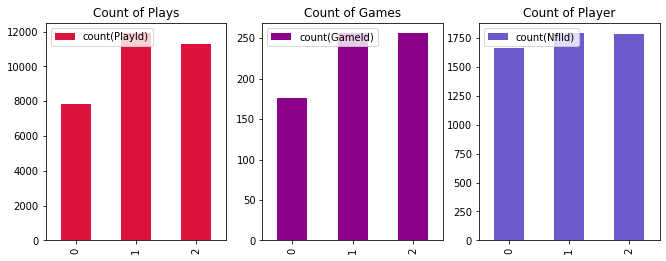

In [47]:
Plays_Games_Players()